In [1]:
library(Seurat)
library(Signac)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [ ]:
## additional filtering low quality ATAC, subset the ATAC assay so nCount_ATAC > 500

In [3]:
Sys.time()
sobj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240104_lung_pt_integ_atac_nodoub.RDS")
Sys.time()

[1] "2024-01-05 09:16:06 PST"

[1] "2024-01-05 09:16:21 PST"

In [ ]:
# sobj_filt_atac <- subset(sobj_atac, nCount_ATAC > 500)
# sobj_filt_atac

In [ ]:
# filter for atac low quality

In [4]:
sobj

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [5]:
colnames(sobj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"              
[41] "celltype_v03"                             
[42] "nCount_integrated"                        
[43] "nFeature_integrated"                      
[44] "celltype_v04"

In [9]:
sobj[['integrated_atac']]
sobj[['integrated']]
sobj[['RNA']]
sobj[['ATAC']]



Assay data with 2000 features for 22242 cells
Top 10 variable features:
 Galntl6, Kcnq5, F13a1, Chil3, Ctnna3, Nxph1, Gpc6, Htr2c, Grip1,
Cfap299 

Assay data with 2000 features for 22242 cells
First 10 features:
 Ttn, Myh6, Fgf12, Ryr2, Kcnj3, D830005E20Rik, Cdc20b, Car3, Mlip, Rbm20 

Assay data with 32285 features for 22242 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

Assay data with 75257 features for 22242 cells
First 10 features:
 chr1-3670536-3671156, chr1-3671301-3672191, chr1-3913332-3914171,
chr1-3915425-3916295, chr1-4255582-4256448, chr1-4259855-4260687,
chr1-4412190-4413102, chr1-4426673-4427603, chr1-4456410-4457357,
chr1-4470987-4472294 

In [24]:
sobj[['ATAC']]
sobj[['H3K27me3']]
sobj[['H3K27ac']]

Assay data with 75257 features for 22242 cells
First 10 features:
 chr1-3670536-3671156, chr1-3671301-3672191, chr1-3913332-3914171,
chr1-3915425-3916295, chr1-4255582-4256448, chr1-4259855-4260687,
chr1-4412190-4413102, chr1-4426673-4427603, chr1-4456410-4457357,
chr1-4470987-4472294 

ChromatinAssay data with 23296 features for 22242 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

Assay data with 71449 features for 22242 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

In [ ]:
# seems like after integration they turn into plain assays

In [16]:
DefaultAssay(sobj) <- 'ATAC'
# even when you specify assay it tries to use the default assay

In [17]:
CoveragePlot(sobj, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, assay = "ATAC") & scale_fill_manual(values = cols)

ERROR: Error in SingleCoveragePlot(object = object, region = region, annotation = annotation, : Requested assay is not a ChromatinAssay.


In [19]:
library(ggplot2) # & scale_fill_manual(values = cols)

In [22]:
Idents(sobj) <- 'celltype_v04'

In [ ]:
# # Error: Cannot find 'nCount_integrated_atac' in this Seurat object, swithch the default assay and it works


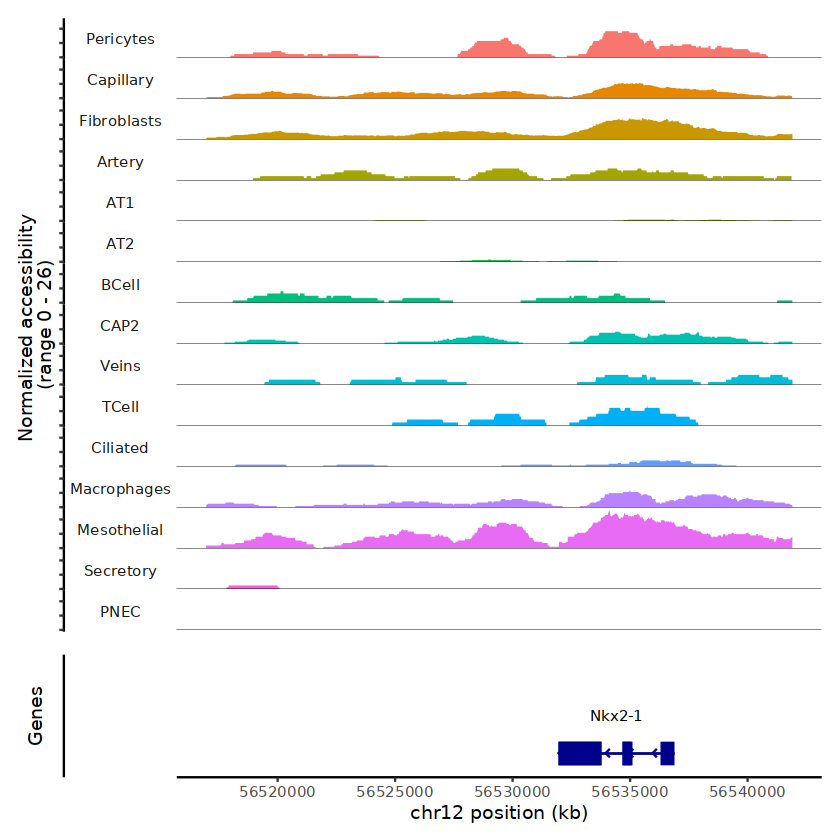

In [23]:

DefaultAssay(sobj) <- 'H3K27me3'

CoveragePlot(sobj, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, assay = "H3K27me3")

In [14]:
CoveragePlot(sobj, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, assay = "H3K27ac") & scale_fill_manual(values = cols)

ERROR: Error in SingleCoveragePlot(object = object, region = region, annotation = annotation, : Requested assay is not a ChromatinAssay.


In [28]:
sobj

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [26]:
quantile(sobj$nCount_ATAC)
quantile(sobj$nFeature_ATAC)

# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%   25%   50%   75%  100% 
    0     0     0   457 60581

0%   25%   50%   75%  100% 
    0     0     0   229 20756

In [30]:
sobj_filt_atac <- subset(sobj, nCount_ATAC > 200)

In [31]:
sobj_filt_atac

An object of class Seurat 
224815 features across 6774 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [27]:
sobj_filt_atac <- subset(sobj, nCount_ATAC > 500)

In [29]:
sobj_filt_atac

An object of class Seurat 
224815 features across 5392 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [32]:
sobj_filt_atac <- subset(sobj, nFeature_ATAC > 200)
sobj_filt_atac

An object of class Seurat 
224815 features across 5788 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [34]:
sobj_filt_atac <- subset(sobj, nFeature_ATAC > 500)
sobj_filt_atac

An object of class Seurat 
224815 features across 3964 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [35]:
sobj_atac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/JL_10_1_2_JL_09_1_2_DF.0.05.RDS")

In [36]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [37]:
sobj_filt_atac <- subset(sobj_atac, nCount_ATAC > 500)
sobj_filt_atac

An object of class Seurat 
126070 features across 6345 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [46]:
# remove these cells from the cleaned merged object
sobj_rm_atac <- subset(sobj_atac, nCount_ATAC > 500, invert = T)
sobj_rm_atac

An object of class Seurat 
126070 features across 3258 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [47]:
cells_rm_atac <- colnames(sobj_rm_atac)

In [48]:
head(cells_rm_atac)

[1] "AAACAGCCACTAAGTT-1" "AAACAGCCAGGAAGCC-1" "AAACAGCCATTGGGAG-1"
[4] "AAACCGAAGCCAAATC-1" "AAACCGAAGCTAATTG-1" "AAACCGAAGGAGGACT-1"

In [ ]:
create cell names as metadata colum
Patient.combined[["CellName"]] <- colnames(Patient.combined)
#get the required cells
Name_of_Normal_Cells_NotImmune <- c('CGCAGGTTCAGCCTTC', 'GTGCTTCGTTGTAAAG', 'AAAGTCCCATCCTAAG', 'AACCATGGTAAGATAC')
#subset the required cells
Patient.combined.Normal.NotImmune <- subset(Patient.combined, subset = CellName %in% Name_of_Normal_Cells_NotImmune )


In [45]:
sobj$cell_barcode <- colnames(sobj)

In [49]:
sobj

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [ ]:
# subset the cleaned object for 

In [50]:
sobj_cln_filt_atac <- subset(sobj, subset = cell_barcode %in% cells_rm_atac , invert = T)

In [51]:
sobj_cln_filt_atac

An object of class Seurat 
224815 features across 19260 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

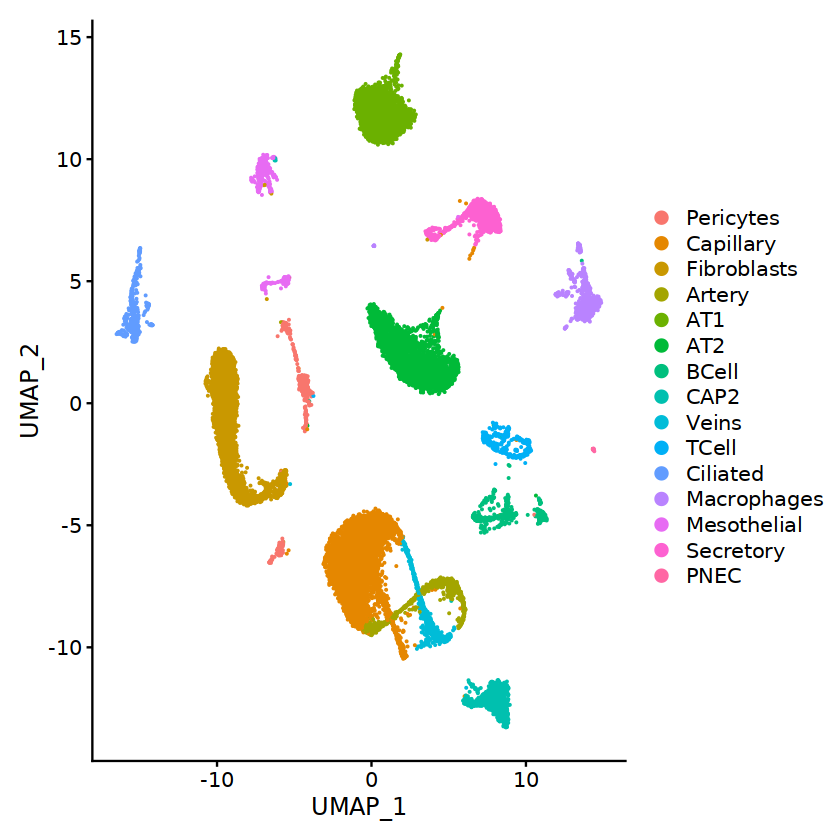

In [54]:
DimPlot(sobj)

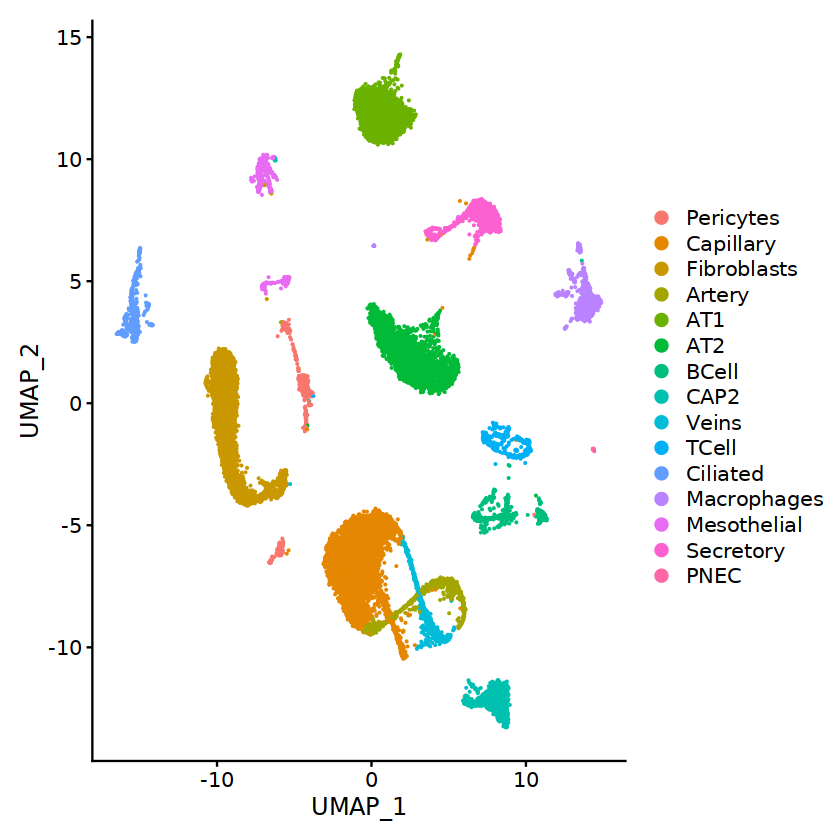

In [53]:
DimPlot(sobj_cln_filt_atac)

In [52]:
22242-19260

[1] 2982

In [ ]:
subset(sobj, )

In [ ]:
# seems like 2982 cells removed with atac filter, maybe the other cells are actually removed when 
# removing doublets and removing small clusters

In [43]:
grep("AAACAGCCAATAACGA", colnames(sobj), value = T)

[1] "AAACAGCCAATAACGA-1_1"

In [40]:
head(colnames(sobj))

[1] "AAACAGCCAATAACGA-1_1" "AAACAGCCAGTTTACG-1_1" "AAACAGCCATAAAGCA-1_1"
[4] "AAACAGCCATCATGTG-1_1" "AAACATGCAATCCCTT-1_1" "AAACATGCAGTTAAAG-1_1"

In [41]:
tail(colnames(sobj))

[1] "TTTGTGTTCGTTACTT-1" "TTTGTTGGTATTCGCT-1" "TTTGTTGGTCACTCGC-1"
[4] "TTTGTTGGTGATCAGC-1" "TTTGTTGGTTAGGTTG-1" "TTTGTTGGTTTCCTCC-1"

In [39]:
sobj

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [55]:
sobj_cln_filt_atac

An object of class Seurat 
224815 features across 19260 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [56]:
Sys.time()
saveRDS(sobj_cln_filt_atac, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_01_lung_pt_integ_atac_nodoub_filt_atac.RDS")
Sys.time()

[1] "2024-01-05 11:23:30 PST"

[1] "2024-01-05 11:24:36 PST"

In [66]:
quantile(sobj_cln_filt_atac$nCount_ATAC)
quantile(sobj_cln_filt_atac$nFeature_ATAC)

# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%   25%   50%   75%  100% 
    0     0     0   672 60581

0%   25%   50%   75%  100% 
    0     0     0   333 20756

In [67]:
quantile(sobj_cln_filt_atac$nCount_RNA)
quantile(sobj_cln_filt_atac$nFeature_RNA)

# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%   25%   50%   75%  100% 
  151  1608  2346  3567 19018

0%  25%  50%  75% 100% 
 134 1004 1328 1770 5304

In [ ]:


## uncleaned atac obj, doublets still in, small clusters not removed

In [ ]:
## should hopefully see the 3258 cells removed

In [57]:
## object before cleaning (ATAC is not filtered, doublets present and low qc clusters still present)
obj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240103_lung_pt_integ_atac.RDS")

In [58]:
obj

An object of class Seurat 
224815 features across 24559 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [62]:
obj$cell_barcode <- colnames(obj)

In [63]:
sobj_ucln_filt_atac <- subset(obj, subset = cell_barcode %in% cells_rm_atac , invert = T)

In [64]:
sobj_ucln_filt_atac 

An object of class Seurat 
224815 features across 21301 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [65]:
24559-21301

[1] 3258

In [68]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [ ]:
## maybe check distribution of just atac assay to see if they're different

In [70]:
sobj_atac$cell_barcode <- colnames(sobj_atac)

In [74]:
# this is the latest object (doublets removed, low qc clusters removed, and ATAC filtered nCount>500)
# subsetting for just ATAC barcodes to see quantile distribution
only_cln_atac <- subset(sobj_cln_filt_atac, subset = cell_barcode %in% colnames(sobj_atac))

In [75]:
only_cln_atac

An object of class Seurat 
224815 features across 5392 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [76]:
quantile(only_cln_atac$nCount_ATAC) #okay so it did actually filter the nCounts
quantile(only_cln_atac$nFeature_ATAC)

# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%     25%     50%     75%    100% 
  501.0   991.0  1969.5  4687.0 60581.0

0%      25%      50%      75%     100% 
  221.00   481.75   948.50  2148.25 20756.00

In [77]:
# cleaned but not cleaned atac
# this is the latest object (doublets removed, low qc clusters removed, but ATAC not filtered)
# subsetting for just ATAC barcodes to see quantile distribution
not_cln_atac <- subset(sobj, subset = cell_barcode %in% colnames(sobj_atac))

In [78]:
not_cln_atac

An object of class Seurat 
224815 features across 8374 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [80]:
quantile(not_cln_atac$nCount_ATAC) #okay so it did actually filter the nCounts
quantile(not_cln_atac$nFeature_ATAC)

0%     25%     50%     75%    100% 
    2.0   292.0   923.5  2846.0 60581.0

0%      25%      50%      75%     100% 
    1.00   146.25   452.00  1321.75 20756.00